In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [5]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
x=df['Daily Steps'].value_counts()
x.index.min()

3000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.shape

(374, 13)

In [10]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [12]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [13]:
df['Sleep Disorder'].isnull().sum()

219

In [14]:
df['Sleep Disorder'].fillna("Fit",inplace=True)

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_26212\2644319355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna("Fit",inplace=True)


In [15]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Fit
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Fit
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Fit
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [16]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Fit            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [18]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [19]:
pressure=df['Blood Pressure'].str.split("/")

In [20]:
pressure.str.get(0).head()

0    126
1    125
2    125
3    140
4    140
Name: Blood Pressure, dtype: object

In [21]:
integerpressureHigh=list(map(float,pressure.str.get(0)))
integerpressureLow=list(map(float,pressure.str.get(1)))

In [22]:
# pressure.str.get(0)
df['PressureHigh']=integerpressureHigh
df['PressureLow']=integerpressureLow

In [23]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Fit,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Fit,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Fit,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [24]:
df.drop('Blood Pressure',axis=1,inplace=True)

In [25]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [26]:
df.shape

(374, 14)

In [27]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [28]:
x=df.corr(numeric_only= True,method= 'pearson')

In [29]:
x

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,PressureHigh,PressureLow
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.611551,0.590670
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
PressureHigh,0.611551,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
PressureLow,0.590670,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


<AxesSubplot: >

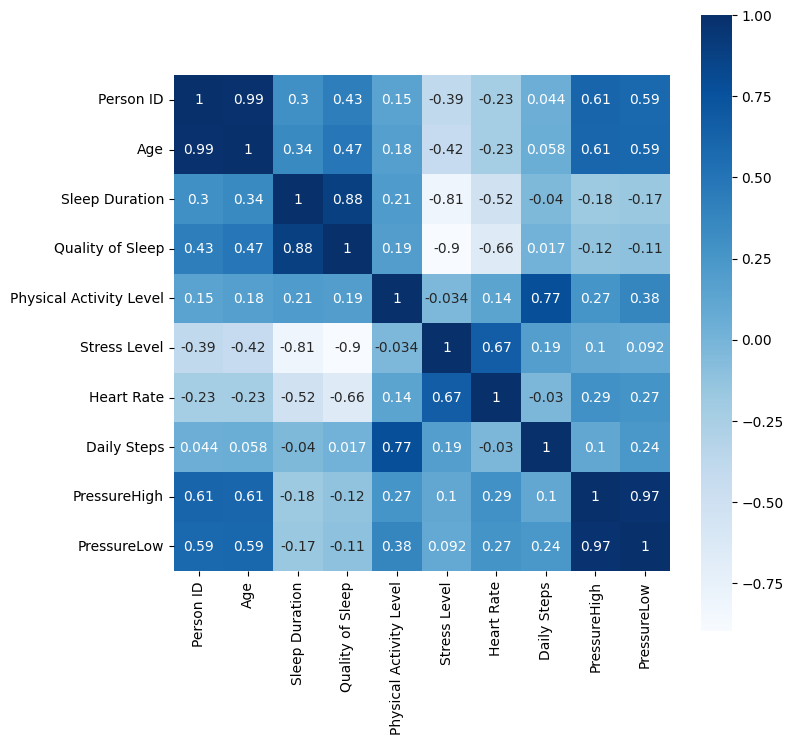

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(x,square=True,annot=True,cbar=True,annot_kws={'size':10},cmap="Blues")

In [31]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


<AxesSubplot: xlabel='Age', ylabel='Stress Level'>

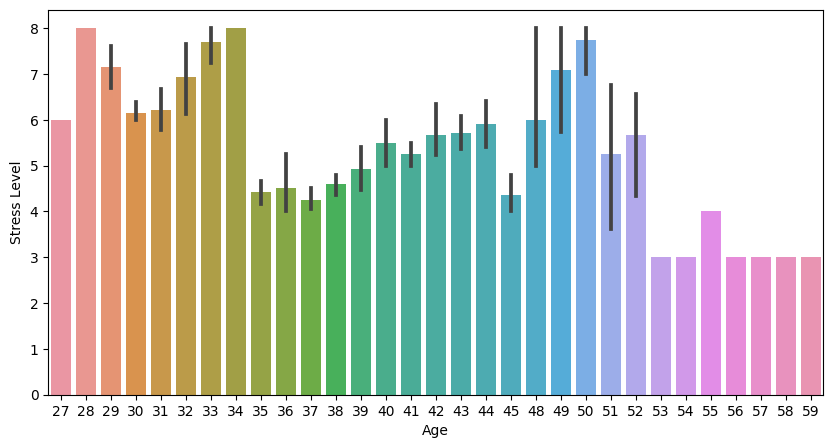

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,y=df['Stress Level'],x=df['Age'])

In [33]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [34]:
df['BMI Category']=df['BMI Category'].replace({"Normal Weight": 'Normal'})

In [35]:
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [36]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [37]:
y=df['Physical Activity Level'].value_counts()

In [38]:
y.sort_index()

Physical Activity Level
30    68
32     2
35     4
40     6
42     2
45    68
47     1
50     4
55     6
60    70
65     2
70     3
75    67
80     2
85     2
90    67
Name: count, dtype: int64

In [39]:
y.sort_values()

Physical Activity Level
47     1
42     2
32     2
80     2
65     2
85     2
70     3
35     4
50     4
40     6
55     6
75    67
90    67
30    68
45    68
60    70
Name: count, dtype: int64

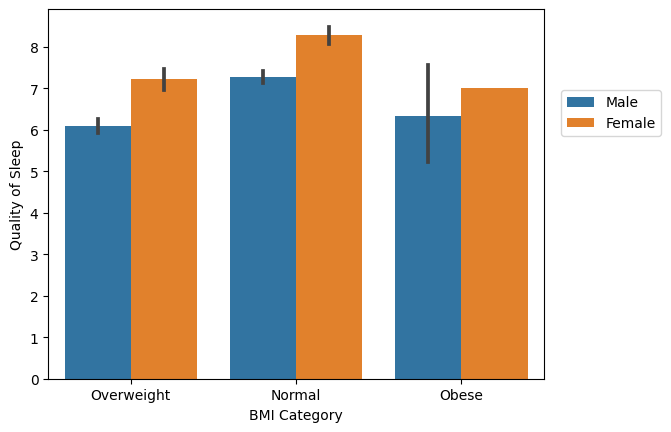

In [40]:
sns.barplot(data=df,x=df['BMI Category'],y=df['Quality of Sleep'],hue="Gender")
plt.legend(bbox_to_anchor=(1.25,0.8))

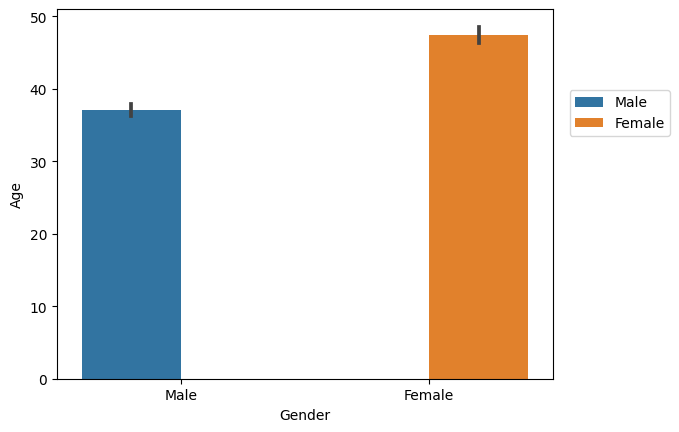

In [41]:
sns.barplot(data=df,x=df['Gender'],y=df['Age'],hue="Gender")
plt.legend(bbox_to_anchor=(1.25,0.8))

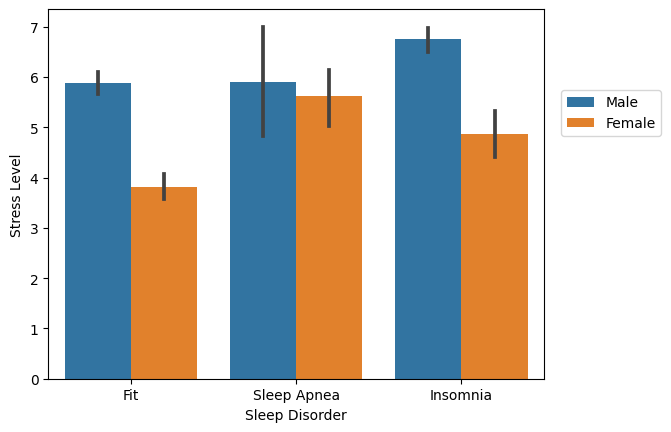

In [42]:
sns.barplot(data=df,x=df['Sleep Disorder'],y=df['Stress Level'],hue="Gender")
plt.legend(bbox_to_anchor=(1.25,0.8))

In [43]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0


In [44]:
# sns.pairplot(df,kind='reg',diag_kind="Auto",hue='Sleep Disorder')


<AxesSubplot: xlabel='Gender', ylabel='Quality of Sleep'>

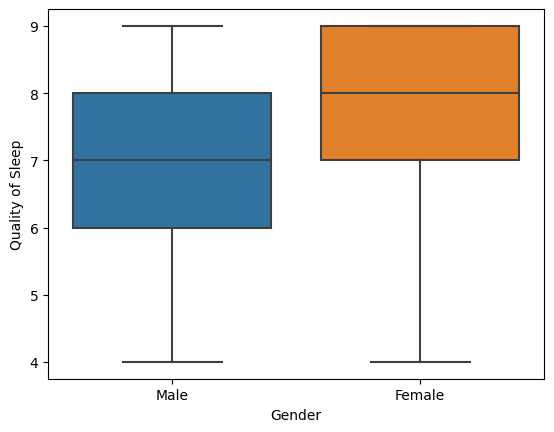

In [45]:
sns.boxplot(df,x="Gender",y="Quality of Sleep")

In [46]:
age_group=[20,30,40,50,60]
df["Age Group"]=pd.cut(x=df["Age"],bins=age_group)

In [47]:
df[["Age",'Age Group']].head(5)

,Age,Age Group
0,27,"(20, 30]"
1,28,"(20, 30]"
2,28,"(20, 30]"
3,28,"(20, 30]"
4,28,"(20, 30]"


C:\Users\HARSHIT\anaconda3\envs\joker\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HARSHIT\anaconda3\envs\joker\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HARSHIT\anaconda3\envs\joker\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

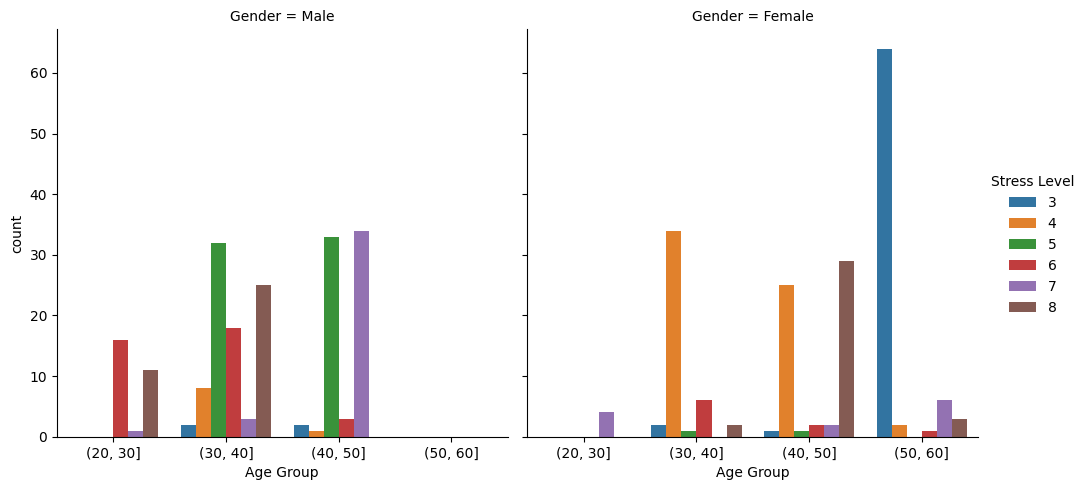

In [48]:
sns.catplot(df,x="Age Group",hue="Stress Level", kind='count',col="Gender")

In [49]:
occupation_stress=pd.crosstab(df['Occupation'],df['Stress Level'])

In [50]:
occupation_stress

Stress Level,3,4,5,6,7,8
Occupation,,,,,,
Accountant,2,26,0,3,6,0
Doctor,4,0,2,32,0,33
Engineer,34,9,16,1,3,0
Lawyer,0,0,44,3,0,0
Manager,0,0,1,0,0,0
Nurse,31,4,0,2,4,32
Sales Representative,0,0,0,0,0,2
Salesperson,0,0,0,0,32,0
Scientist,0,0,0,2,0,2


<AxesSubplot: xlabel='Occupation'>

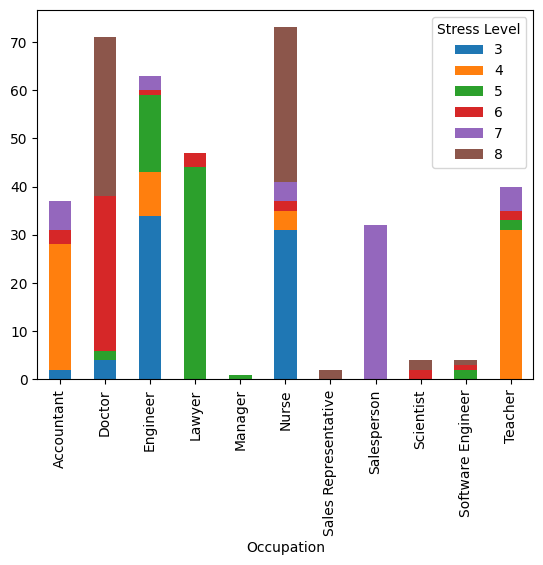

In [51]:
occupation_stress.plot(kind='bar',stacked=True)

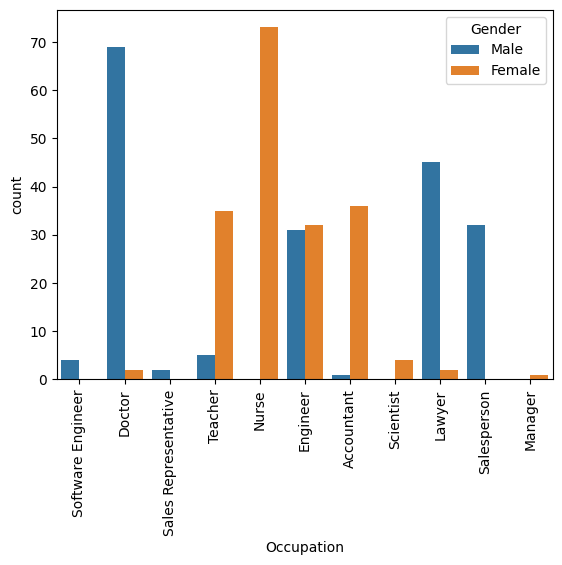

In [52]:
sns.countplot(x=df['Occupation'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

In [53]:
df['Gender']=df["Gender"].replace({
    "Male":0,
    "Female":1})

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_26212\3036623637.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df["Gender"].replace({


In [54]:
df.drop("Person ID",axis=1, inplace=True)

In [55]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group
0,0,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0,"(20, 30]"
1,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
2,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
3,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"
4,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"


In [56]:
label_encode=LabelEncoder()

In [57]:
# label=label_encode.fit_transform(df['Sleep Disorder'])
# # 0--->Fit
# # 2--->Sleep Apnea
# # 1--->insomania
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group
0,0,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0,"(20, 30]"
1,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
2,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
3,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"
4,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"


In [58]:
# df['Sleep Disorder']=label

In [59]:
df.head(4)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group
0,0,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0,"(20, 30]"
1,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
2,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
3,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"


In [60]:
df["Occupation"].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [61]:
df['Occupation']=df['Occupation'].replace(['Accountant','Salesperson','Software Engineer','Scientist',
                           'Sales Representative','Manager'],"Others")

In [62]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group
0,0,27,Others,6.1,6,42,6,Overweight,77,4200,Fit,126.0,83.0,"(20, 30]"
1,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
2,0,28,Doctor,6.2,6,60,8,Normal,75,10000,Fit,125.0,80.0,"(20, 30]"
3,0,28,Others,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"
4,0,28,Others,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"


In [63]:
df["Occupation"].value_counts()

Occupation
Others      80
Nurse       73
Doctor      71
Engineer    63
Lawyer      47
Teacher     40
Name: count, dtype: int64

In [64]:
label_BMI=label_encode.fit_transform(df['BMI Category'])

In [65]:
label_BMI
# 0--->Overweight
# 1--->Normal
# 2--->Obese
df['BMI Category']=label_BMI

In [66]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group
0,0,27,Others,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]"
1,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]"
2,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]"
3,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"
4,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]"
370,1,59,Nurse,8.0,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]"
371,1,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]"
372,1,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]"


# Encoding Occupation then scale the data set AND which model (Linear,Random forest?)

In [67]:
df["Occupation"].value_counts()

Occupation
Others      80
Nurse       73
Doctor      71
Engineer    63
Lawyer      47
Teacher     40
Name: count, dtype: int64

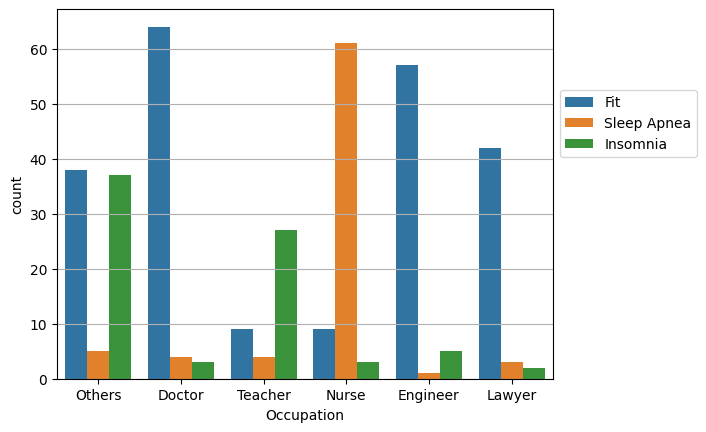

In [68]:
sns.countplot(x=df['Occupation'],hue=df['Sleep Disorder'])
plt.legend(bbox_to_anchor=(1,0.8))
plt.grid(visible=True,which='both',axis='y')

In [69]:
xy=df.corr(numeric_only= True,method= 'pearson')

<AxesSubplot: >

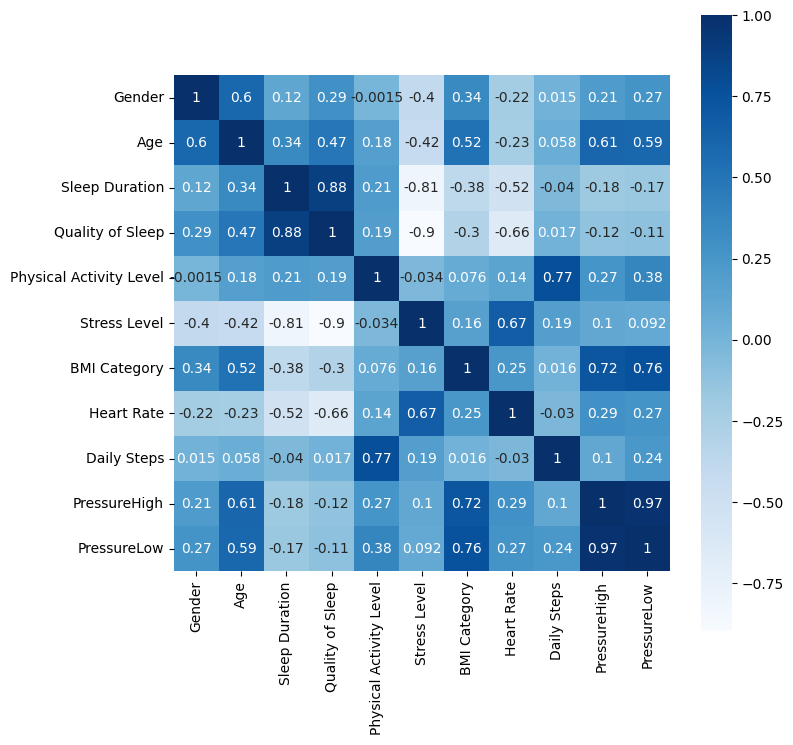

In [70]:
plt.figure(figsize=(8,8))
sns.heatmap(xy,square=True,annot=True,cbar=True,annot_kws={'size':10},cmap="Blues")

In [71]:
oneEncode=OneHotEncoder()

In [72]:
dff=df
dff.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group
0,0,27,Others,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]"
1,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]"
2,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]"
3,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"
4,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]"


In [73]:
dff.dtypes

Gender                        int64
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                  int32
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder               object
PressureHigh                float64
PressureLow                 float64
Age Group                  category
dtype: object

In [74]:
dff["Occupation"].unique()

array(['Others', 'Doctor', 'Teacher', 'Nurse', 'Engineer', 'Lawyer'],
      dtype=object)

In [75]:
oneEncode.fit_transform(dff[['Occupation']]).toarray()

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [76]:
features_array=oneEncode.fit_transform(dff[['Occupation']]).toarray()

In [77]:
oneEncode.categories_

[array(['Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Others', 'Teacher'],
       dtype=object)]

In [78]:
features_labels=oneEncode.categories_

In [79]:
np.array(features_labels).ravel()

array(['Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Others', 'Teacher'],
      dtype=object)

In [80]:
features_labels=np.array(features_labels).ravel()

In [81]:
print(features_labels)

['Doctor' 'Engineer' 'Lawyer' 'Nurse' 'Others' 'Teacher']


In [82]:
dfOne=pd.DataFrame(features_array,columns=features_labels)

In [83]:
dfOne

,Doctor,Engineer,Lawyer,Nurse,Others,Teacher
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
369,0.0,0.0,0.0,1.0,0.0,0.0
370,0.0,0.0,0.0,1.0,0.0,0.0
371,0.0,0.0,0.0,1.0,0.0,0.0
372,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
dff=pd.concat([dff,dfOne],axis=1)

In [85]:
dff.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group,Doctor,Engineer,Lawyer,Nurse,Others,Teacher
0,0,27,Others,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0
1,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0,0.0
2,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0,0.0
3,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0
4,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
df=dff
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group,Doctor,Engineer,Lawyer,Nurse,Others,Teacher
0,0,27,Others,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0
1,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0,0.0
2,0,28,Doctor,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0,0.0
3,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0
4,0,28,Others,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
df.drop(['Occupation','Others'],axis=1)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group,Doctor,Engineer,Lawyer,Nurse,Teacher
0,0,27,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
1,0,28,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0
2,0,28,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0
3,0,28,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
4,0,28,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]",0.0,0.0,0.0,1.0,0.0
370,1,59,8.0,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]",0.0,0.0,0.0,1.0,0.0
371,1,59,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]",0.0,0.0,0.0,1.0,0.0
372,1,59,8.1,9,75,3,2,68,7000,Sleep Apnea,140.0,95.0,"(50, 60]",0.0,0.0,0.0,1.0,0.0


In [88]:
df.drop(['Occupation','Others'],axis=1,inplace=True)

In [89]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group,Doctor,Engineer,Lawyer,Nurse,Teacher
0,0,27,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
1,0,28,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0
2,0,28,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0
3,0,28,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
4,0,28,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

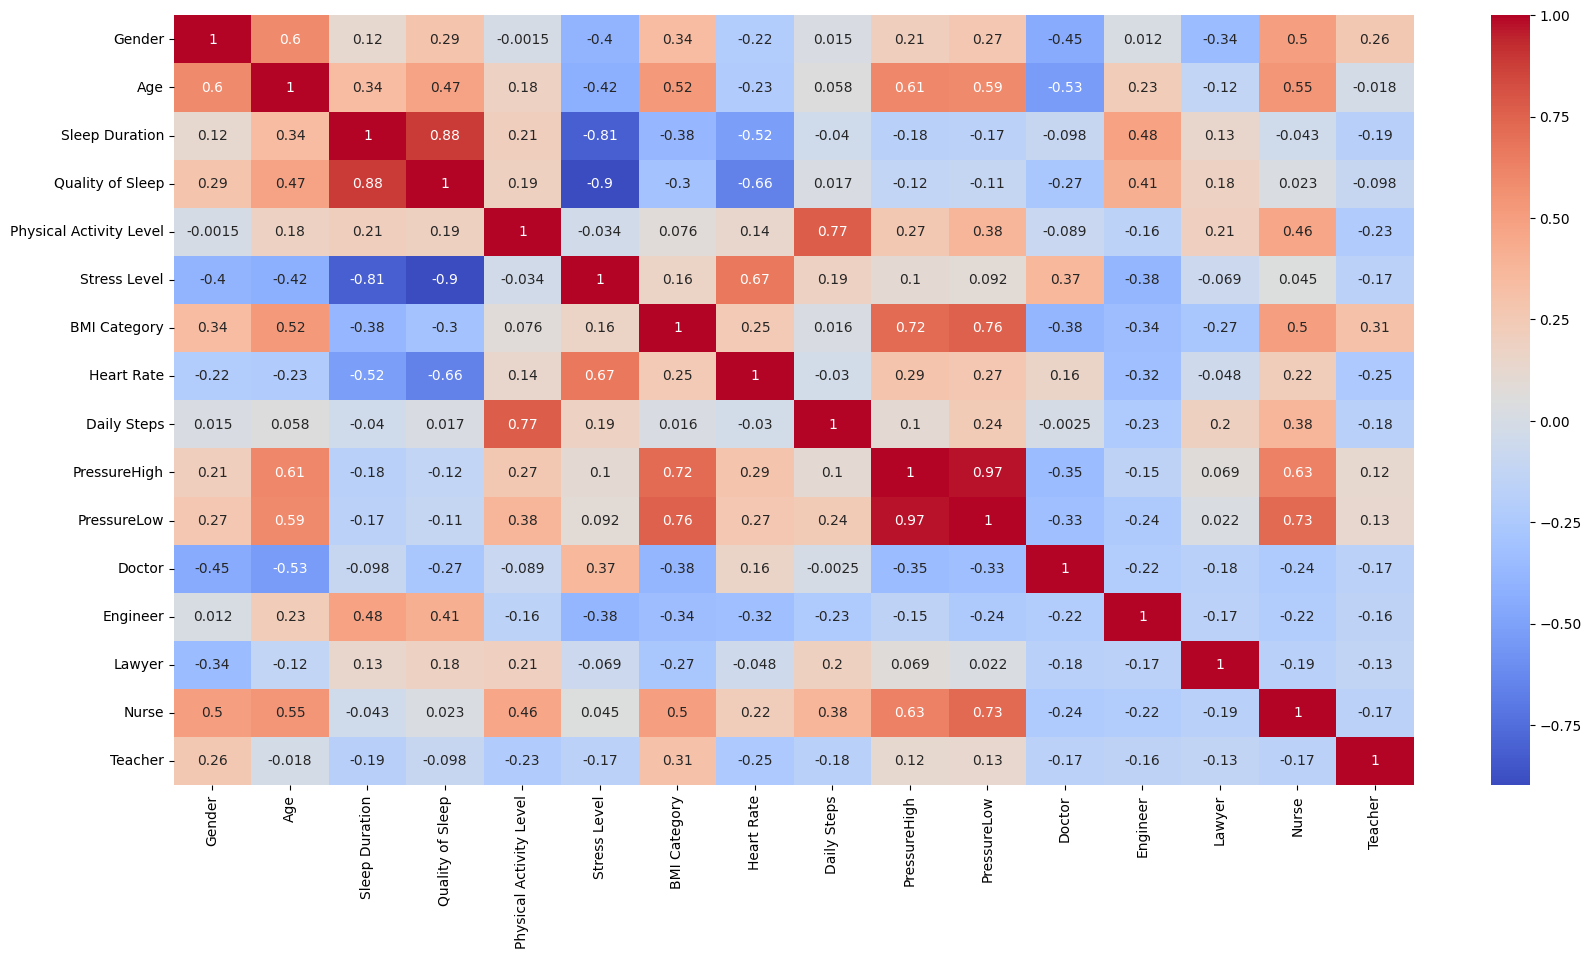

In [90]:
final=df.corr(numeric_only= True,method= 'pearson')
plt.figure(figsize=(20,10))
sns.heatmap(final,annot=True,cbar=True,annot_kws={'size':10},cmap="coolwarm")

In [91]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,PressureHigh,PressureLow,Age Group,Doctor,Engineer,Lawyer,Nurse,Teacher
0,0,27,6.1,6,42,6,2,77,4200,Fit,126.0,83.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
1,0,28,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0
2,0,28,6.2,6,60,8,0,75,10000,Fit,125.0,80.0,"(20, 30]",1.0,0.0,0.0,0.0,0.0
3,0,28,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0
4,0,28,5.9,4,30,8,1,85,3000,Sleep Apnea,140.0,90.0,"(20, 30]",0.0,0.0,0.0,0.0,0.0


In [92]:
df.shape

(374, 18)

In [93]:
X=df.drop(['Age Group','Sleep Disorder'],axis=1)
y=df['Sleep Disorder']

In [94]:
X

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,PressureHigh,PressureLow,Doctor,Engineer,Lawyer,Nurse,Teacher
0,0,27,6.1,6,42,6,2,77,4200,126.0,83.0,0.0,0.0,0.0,0.0,0.0
1,0,28,6.2,6,60,8,0,75,10000,125.0,80.0,1.0,0.0,0.0,0.0,0.0
2,0,28,6.2,6,60,8,0,75,10000,125.0,80.0,1.0,0.0,0.0,0.0,0.0
3,0,28,5.9,4,30,8,1,85,3000,140.0,90.0,0.0,0.0,0.0,0.0,0.0
4,0,28,5.9,4,30,8,1,85,3000,140.0,90.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0
370,1,59,8.0,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0
371,1,59,8.1,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0
372,1,59,8.1,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0


In [95]:
y

0              Fit
1              Fit
2              Fit
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [96]:
# training and testing data
# 70% for training 20% for testing and 10% for validations 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=44)

In [97]:
print(X.shape,X_train.shape,X_test.shape,sep="<==>")
print(y.shape,y_train.shape,y_test.shape,sep="<==>")

(374, 16)<==>(280, 16)<==>(94, 16)
(374,)<==>(280,)<==>(94,)


In [98]:
X_test

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,PressureHigh,PressureLow,Doctor,Engineer,Lawyer,Nurse,Teacher
135,0,38,7.3,8,60,5,0,68,8000,130.0,85.0,0.0,0.0,1.0,0.0,0.0
248,0,44,6.4,6,45,7,2,72,6000,130.0,85.0,0.0,0.0,0.0,0.0,0.0
236,0,44,6.4,6,45,7,2,72,6000,130.0,85.0,0.0,0.0,0.0,0.0,0.0
38,0,31,7.6,7,75,6,0,70,8000,120.0,80.0,1.0,0.0,0.0,0.0,0.0
162,1,40,7.2,8,55,6,0,73,7300,119.0,77.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,43,6.5,6,45,7,2,72,6000,130.0,85.0,0.0,0.0,0.0,0.0,0.0
283,1,50,6.0,6,90,8,2,75,10000,140.0,95.0,0.0,0.0,0.0,1.0,0.0
174,0,41,7.6,8,90,5,0,70,8000,130.0,85.0,0.0,0.0,1.0,0.0,0.0
216,0,43,7.8,8,90,5,0,70,8000,130.0,85.0,0.0,1.0,0.0,0.0,0.0


In [99]:
y_test

135            Fit
248            Fit
236       Insomnia
38             Fit
162            Fit
          ...     
193       Insomnia
283    Sleep Apnea
174            Fit
216            Fit
230       Insomnia
Name: Sleep Disorder, Length: 94, dtype: object

In [100]:
# model training
# RandomForestClassifier
model=RandomForestClassifier(n_estimators=80,random_state=0)

In [101]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

In [102]:
# accuracy score value on test
X_test_predict=model.predict(X_test)

In [103]:
X_test_predict

array(['Fit', 'Insomnia', 'Insomnia', 'Fit', 'Fit', 'Fit', 'Fit', 'Fit',
       'Fit', 'Fit', 'Fit', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea',
       'Fit', 'Fit', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'Insomnia',
       'Fit', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'Fit', 'Fit',
       'Insomnia', 'Fit', 'Insomnia', 'Fit', 'Sleep Apnea', 'Fit', 'Fit',
       'Fit', 'Fit', 'Fit', 'Fit', 'Fit', 'Sleep Apnea', 'Fit', 'Fit',
       'Fit', 'Insomnia', 'Insomnia', 'Fit', 'Insomnia', 'Fit',
       'Sleep Apnea', 'Fit', 'Fit', 'Fit', 'Fit', 'Fit', 'Fit', 'Fit',
       'Fit', 'Fit', 'Fit', 'Fit', 'Insomnia', 'Fit', 'Insomnia', 'Fit',
       'Fit', 'Sleep Apnea', 'Fit', 'Fit', 'Insomnia', 'Sleep Apnea',
       'Fit', 'Sleep Apnea', 'Fit', 'Fit', 'Fit', 'Sleep Apnea', 'Fit',
       'Insomnia', 'Fit', 'Fit', 'Fit', 'Fit', 'Sleep Apnea',
       'Sleep Apnea', 'Fit', 'Fit', 'Fit', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'Fit', 'Fit', 'Insomnia'],
      dtype=obj

In [104]:
X_test_accuracy=accuracy_score(X_test_predict,y_test)
X_test_accuracy

0.925531914893617

In [105]:
# builing a predictive system
input_data=[[1,59,8.1,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0]]
input_data_asnp=np.asarray(input_data)



In [106]:
stress_check =model.predict([[1,59,8.1,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0]])

C:\Users\HARSHIT\anaconda3\envs\joker\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [107]:
stress_check

array(['Sleep Apnea'], dtype=object)

# Using pickle MODULE TO SAVE ML model 

In [108]:
# save file

# Assuming 'model' is your model object
with open("./stress_check", 'wb') as file:
    pickle.dump(model, file)

#     OR
# pickle.dump(model,open('./test','wb'))

In [109]:
#how to use it
# model_loaded=pickle.load(open("./stress_check",'rb'))
#     OR
with open("./stress_check", 'rb') as file:
    model_loaded = pickle.load(file)
    check=model_loaded.predict([[1,59,8.1,9,75,3,2,68,7000,140.0,95.0,0.0,0.0,0.0,1.0,0.0]])
print(check)

['Sleep Apnea']


C:\Users\HARSHIT\anaconda3\envs\joker\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
